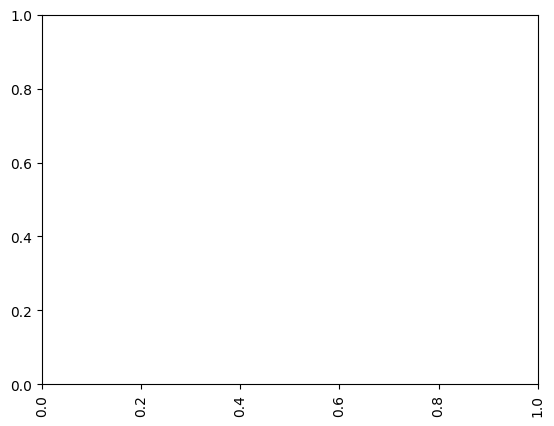

In [72]:
import pandas as pd
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
import humanize
plt.style.use('default')
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(20,8)})
sns.set(font_scale = 2)
# sns.set_theme(style="whitegrid", palette="pastel")

In [73]:
# !pip install jupyterthemes
# !jt -t grade3

In [90]:
def save_fig(label):
    global plt
    global sns
    sns.set_theme(style="ticks")
    plt.savefig(f"{label}.pdf")
    plt.savefig(f"{label}.png")
    return plt
save_fig("initialize")

<module 'matplotlib.pyplot' from '/home/green/ENV3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

<Figure size 2000x800 with 0 Axes>

In [91]:
df = pd.read_csv('gpu0.log', skiprows=[0])
df.columns = ["date", "id", "gpu utilization in %", "memory utilization in %", "encoder utilization in %", "decoder util8zation in %", "temperature in C", "power draw in W" ]
# df.date=df.date.apply(lambda x: x.split(".")[0])
df['date']= pd.to_datetime(df['date'], format='%Y-%m-%d:%H:%M:%S.%f')

df['time'] = df.date.astype(int)
t0 = df['time'][0]
df['time'] = (df['time'] - t0) / 10000000

# df['seconds'] = df['seconds'].dt.total_seconds()
df

# df.info()


,date,id,gpu utilization in %,memory utilization in %,encoder utilization in %,decoder util8zation in %,temperature in C,power draw in W,time
0,2022-05-22 16:54:15.760601,0,0,0,0,0,26,52.17,0.000000e+00
1,2022-05-22 16:54:16.320884,0,0,0,0,0,26,52.17,5.602830e+01
2,2022-05-22 16:54:16.676459,0,0,0,0,0,26,52.17,9.158580e+01
3,2022-05-22 16:54:17.094894,0,0,0,0,0,26,52.17,1.334293e+02
4,2022-05-22 16:54:17.470884,0,0,0,0,0,26,52.17,1.710283e+02
...,...,...,...,...,...,...,...,...,...
46193,2022-05-22 21:41:44.280181,0,0,0,0,0,27,75.44,1.724852e+06
46194,2022-05-22 21:41:44.786542,0,100,3,0,0,27,78.39,1.724903e+06
46195,2022-05-22 21:41:45.182841,0,100,3,0,0,27,78.07,1.724942e+06
46196,2022-05-22 21:41:45.555073,0,100,3,0,0,27,75.44,1.724979e+06


In [92]:
df

,date,id,gpu utilization in %,memory utilization in %,encoder utilization in %,decoder util8zation in %,temperature in C,power draw in W,time
0,2022-05-22 16:54:15.760601,0,0,0,0,0,26,52.17,0.000000e+00
1,2022-05-22 16:54:16.320884,0,0,0,0,0,26,52.17,5.602830e+01
2,2022-05-22 16:54:16.676459,0,0,0,0,0,26,52.17,9.158580e+01
3,2022-05-22 16:54:17.094894,0,0,0,0,0,26,52.17,1.334293e+02
4,2022-05-22 16:54:17.470884,0,0,0,0,0,26,52.17,1.710283e+02
...,...,...,...,...,...,...,...,...,...
46193,2022-05-22 21:41:44.280181,0,0,0,0,0,27,75.44,1.724852e+06
46194,2022-05-22 21:41:44.786542,0,100,3,0,0,27,78.39,1.724903e+06
46195,2022-05-22 21:41:45.182841,0,100,3,0,0,27,78.07,1.724942e+06
46196,2022-05-22 21:41:45.555073,0,100,3,0,0,27,75.44,1.724979e+06


In [93]:
df.describe()

,id,gpu utilization in %,memory utilization in %,encoder utilization in %,decoder util8zation in %,temperature in C,power draw in W,time
count,46198.0,46198.000000,46198.000000,46198.0,46198.0,46198.000000,46198.000000,4.619800e+04
mean,0.0,6.394822,1.527317,0.0,0.0,27.376488,63.762982,8.437706e+05
std,0.0,17.310965,4.087917,0.0,0.0,2.668495,19.482436,4.834301e+05
min,0.0,0.000000,0.000000,0.0,0.0,24.000000,51.850000,0.000000e+00
25%,0.0,0.000000,0.000000,0.0,0.0,26.000000,58.340000,4.452372e+05
50%,0.0,0.000000,0.000000,0.0,0.0,27.000000,58.670000,8.090414e+05
75%,0.0,3.000000,1.000000,0.0,0.0,27.000000,60.150000,1.256588e+06
max,0.0,100.000000,24.000000,0.0,0.0,38.000000,167.490000,1.725013e+06


In [94]:
s = df.sum(axis=0)
s = pd.DataFrame(s)
s.columns = ["sum"]
s["Sum"] = s.apply(lambda x: humanize.intword(x))
s
#s.info()

/tmp/ipykernel_25276/2425686330.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s = df.sum(axis=0)


,sum,Sum
id,0.000000e+00,0.000000e+00
gpu utilization in %,2.954280e+05,2.954280e+05
memory utilization in %,7.055900e+04,7.055900e+04
encoder utilization in %,0.000000e+00,0.000000e+00
decoder util8zation in %,0.000000e+00,0.000000e+00
temperature in C,1.264739e+06,1.264739e+06
power draw in W,2.945722e+06,2.945722e+06
time,3.898051e+10,3.898051e+10


In [95]:
data = pd.DataFrame(df, columns=["time", "gpu utilization in %", "memory utilization in %"])
data = data.set_index("time")
# data = data.head(100)
data

,gpu utilization in %,memory utilization in %
time,,
0.000000e+00,0,0
5.602830e+01,0,0
9.158580e+01,0,0
1.334293e+02,0,0
1.710283e+02,0,0
...,...,...
1.724852e+06,0,0
1.724903e+06,100,3
1.724942e+06,100,3


<module 'matplotlib.pyplot' from '/home/green/ENV3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

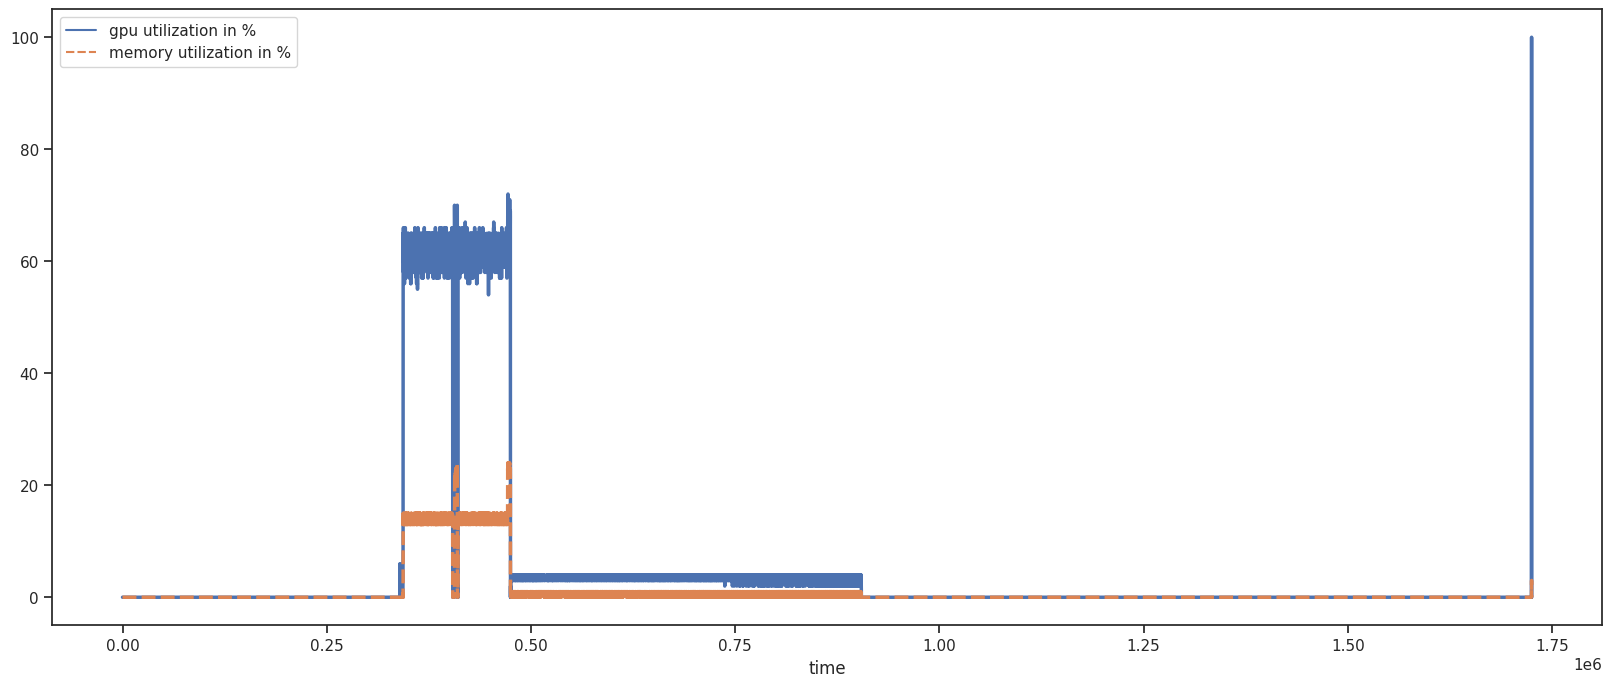

In [96]:
sns.lineplot(data=data, linewidth=2.5)
save_fig("utilization")

<module 'matplotlib.pyplot' from '/home/green/ENV3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

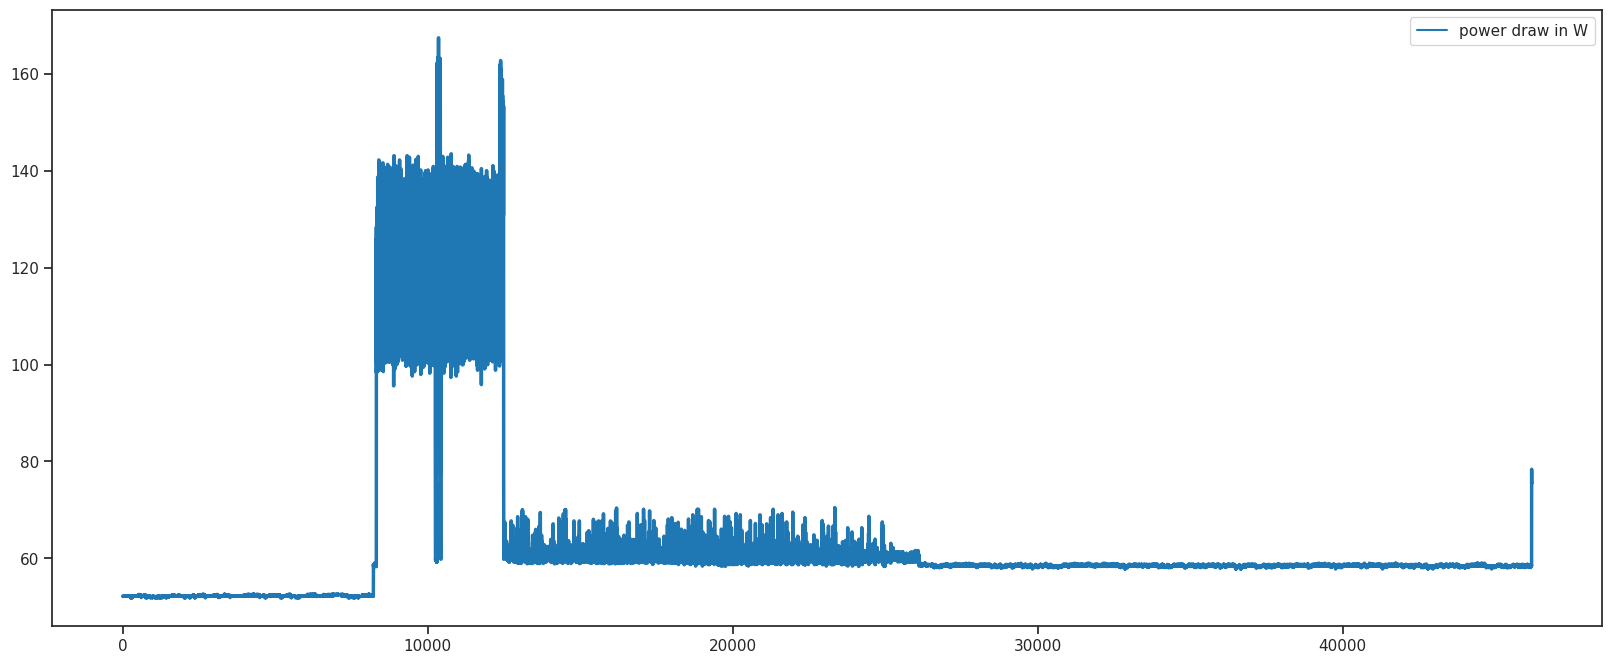

In [97]:
energy = pd.DataFrame(df, columns=["power draw in W"])
sns.lineplot(data=energy, palette="tab10", linewidth=2.5)
save_fig("energy")

<module 'matplotlib.pyplot' from '/home/green/ENV3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

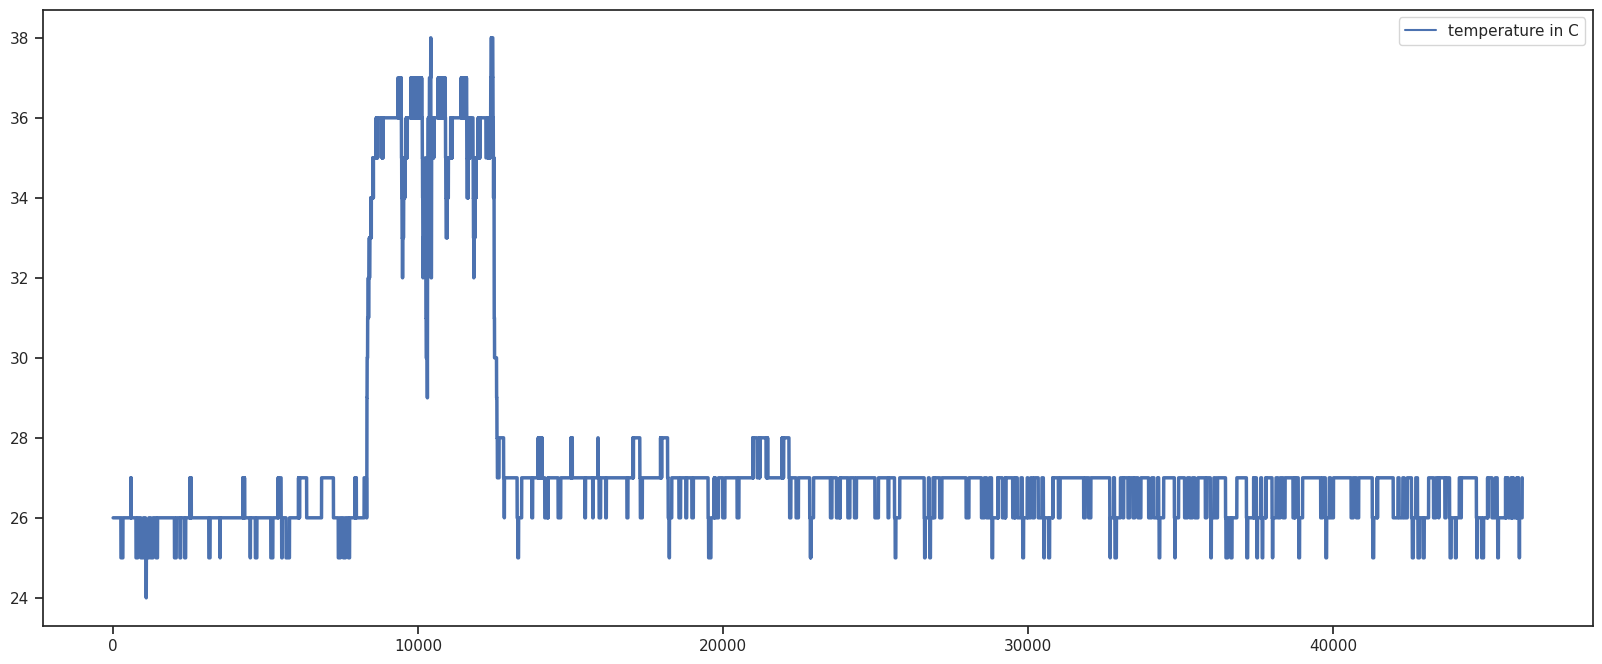

In [98]:
temp = pd.DataFrame(df, columns=["temperature in C"])
sns.lineplot(data=temp, linewidth=2.5)
save_fig("temperature")